# Import library yang diperlukan

import numpy as np: Mengimpor library NumPy dan memberikan alias 'np'. NumPy digunakan untuk komputasi numerik dan operasi array.

import pandas as pd: Mengimpor library Pandas dan memberikan alias 'pd'. Pandas digunakan untuk manipulasi dan analisis data.

import matplotlib.pyplot as plt: Mengimpor modul pyplot dari Matplotlib dan memberikan alias 'plt'. Matplotlib digunakan untuk membuat visualisasi data.

import seaborn as sns: Mengimpor library Seaborn dan memberikan alias 'sns'. Seaborn adalah library visualisasi data statistik berbasis Matplotlib.

%matplotlib inline: Magic command untuk Jupyter Notebook yang memungkinkan plot ditampilkan langsung di notebook.

from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari modul metrics di scikit-learn. Fungsi ini digunakan untuk menghitung akurasi model.

from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari modul model_selection di scikit-learn. Fungsi ini digunakan untuk membagi dataset menjadi set pelatihan dan pengujian.

from sklearn.preprocessing import StandardScaler: Mengimpor kelas StandardScaler dari modul preprocessing di scikit-learn. Kelas ini digunakan untuk menstandarisasi fitur dengan mengurangkan mean dan membagi dengan standar deviasi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

<ol>
<li>sns.set(style="whitegrid", color_codes=True): Mengatur gaya plot Seaborn dengan latar belakang grid putih dan mengaktifkan kode warna.</li>
<li>import itertools: Mengimpor modul itertools untuk menggunakan fungsi product() nanti.</li>
<li>Definisi fungsi plot_confusion_matrix() dengan parameter:</li>

<ul>
<li>cm: Matriks konfusi</li>
<li>classes: Label kelas</li>
<li>normalize: Opsi untuk normalisasi matriks (default: False)</li>
<li>title: Judul plot (default: 'Confusion matrix')</li>
<li>cmap: Colormap untuk plot (default: plt.cm.Blues)</li>
</ul>

<li>plt.imshow(cm, interpolation='nearest', cmap=cmap): Menampilkan matriks konfusi sebagai gambar.</li>
<li>plt.title(title): Menambahkan judul plot.</li>
<li>plt.colorbar(): Menambahkan colorbar ke plot.</li>
<li>Mengatur ticks dan label untuk sumbu x dan y:</li><br>
<div style="border: 1px solid white; color: white; display: inline-block">
<i>
tick_marks = np.arange(len(classes))<br>
plt.xticks(tick_marks, classes, rotation=45)<br>
plt.yticks(tick_marks, classes)</i>
</div><br><br>
<li>Normalisasi matriks jika normalize=True:</li><br>

<div style="border: 1px solid white; color: white; display: inline-block">
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]<br>
    print("Normalized confusion matrix")
    else:<br>
    print('Confusion matrix, without normalization')
    </div>
</ol>

In [2]:
sns.set(style="whitegrid", color_codes=True)
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3 * cm.max() / 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Load Dataset

terdapat 35 kolom dengan 2105 baris data. 35 kolom mengindikasikan 35 variabel. baris data mengindikasikan jumlah data

In [3]:
df = pd.read_csv("data/parkinsons_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


Baris ini menghitung frekuensi kemunculan setiap nilai unik dalam kolom 'DoctorInCharge' dari DataFrame df. Hasilnya disimpan dalam variabel value_counts.

In [4]:
# check for most values in some column
value_counts = df['DoctorInCharge'].value_counts()
print(value_counts)

DoctorInCharge
DrXXXConfid    2105
Name: count, dtype: int64


# Dimensions of Dataset

terdapat 2105 baris dan 35 kolom atau feature dalam dataset

In [5]:
df.shape

(2105, 35)

# Peek at the Data

menampilkan 20 data paling awal

In [6]:
df.head(20)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
5,3063,68,1,2,1,39.423311,1,13.596889,7.796704,7.070239,...,6.824779,0,0,0,0,0,0,0,0,DrXXXConfid
6,3064,78,1,0,0,30.542003,1,2.011281,9.028536,9.838446,...,0.502747,1,0,0,0,1,0,0,0,DrXXXConfid
7,3065,70,1,0,0,36.758282,1,19.988866,3.891749,3.421960,...,1.190611,1,0,0,1,0,0,1,1,DrXXXConfid
8,3066,80,0,2,1,22.380587,1,7.293288,2.595670,4.784827,...,3.438111,0,0,0,0,0,0,0,1,DrXXXConfid
9,3067,71,0,3,2,23.727086,1,17.782910,7.344890,3.393018,...,5.346982,0,0,0,0,0,1,0,0,DrXXXConfid


# Statistical Summary

<p>fungsi df.describe() sebagai berikut:</p>
<ul>
<li>Memberikan gambaran umum tentang distribusi data dalam DataFrame.</li>
<li>Menyediakan statistik ringkasan untuk kolom numerik (dan opsional untuk kolom non-numerik).</li>
</ul>

<p>Output Standar: Untuk kolom numerik, df.describe() menghitung:</p>
<ol>
<li>count: Jumlah entri non-null</li>
<li>mean: Rata-rata</li>
<li>std: Standar deviasi</li>
<li>min: Nilai minimum</li>
<li>25%: Kuartil pertama (Q1)</li>
<li>50%: Median atau kuartil kedua (Q2)</li>
<li>75%: Kuartil ketiga (Q3)</li>
<li>max: Nilai maksimum</li>
</ol>



In [7]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Information of the Dataset

df.info() menjelaskan tipe data dari masing-masing variabel dan identifikasi apakah ada data kosong. pada gambar diketahui variabel numerik berjumlah 34 dan 1 variabel non-numerik

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

# Duplicate Entries

Menghitung jumlah data yang duplikat. pada dataset dibawah, tidak ada data duplikat

In [9]:
df.duplicated().sum()

0

Unwanted Columns

Menghapus variabel DoctorInCharge karena tidak akan digunakan. faktor yang mendukung penghapusan adalah variabel yang non numerik dan nilai yang selalu sama untuk tiap record data

In [10]:
df.drop(columns="DoctorInCharge", axis=1, inplace=True)
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,8.336364,3.200969,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,28.634010,8.076254,1,0,0,0,1,1,0,0
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,13.106537,1.665751,0,0,0,1,0,1,1,1
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,26.527734,4.785614,0,0,0,0,1,1,0,1
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,19.873404,8.378979,1,0,1,0,0,1,1,1


Mengecek jumlah data yang kosong pada tiap kolom/variabel

In [11]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

Menyajikan tabel dan mengecek apkah nilai tidak kosong. apabila nilai tidak kosong, nilai akan diisi dengan true

In [12]:
df.notnull()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2101,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2102,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2103,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


# Outliers

Mengecek semua variabel dari dataset

In [13]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

Menghitung kemiringan data, apabila distribusi miring, kemungkinan ada data yang merupakan outlier/ jauh dari pola. ex di teliti pria berumur 40-70, apabila terdapat anak berumur 15 tahun, itu bisa menjadi outlier dengan skew bernilai negatif sehingga menyebabkan kemirigan ke kiri. Apabila terdapat pria berumur 90, itu menjadi outlier dengan skew bernilai positif sehingga menyebabkan kemiringan ke kanan.

In [14]:
df.skew()

PatientID                   0.000000
Age                        -0.033460
Gender                      0.029478
Ethnicity                   1.244965
EducationLevel              0.163214
BMI                         0.035171
Smoking                     0.892115
AlcoholConsumption         -0.019206
PhysicalActivity            0.025594
DietQuality                 0.034928
SleepQuality                0.008514
FamilyHistoryParkinsons     2.008275
TraumaticBrainInjury        2.554546
Hypertension                2.008275
Diabetes                    1.981515
Depression                  1.460803
Stroke                      4.184889
SystolicBP                  0.028523
DiastolicBP                -0.057021
CholesterolTotal           -0.050801
CholesterolLDL             -0.017991
CholesterolHDL              0.001855
CholesterolTriglycerides    0.017058
UPDRS                      -0.048271
MoCA                       -0.023930
FunctionalAssessment        0.011272
Tremor                      0.275451
R

# Determining Depentend & Independent Variables

Drop variabel id pasien dan diagnosis karena hanya dibutuhkan variabel independent untuk ditampung pada variabel x. id pasien tidak digunakan karena hanya berfungsi sebagai identitas pasien dan tidak mempengaruhi hasil akhir. variabel diagnosis dihapus karena merupakan variabel dependent/variabel penentu.

In [15]:
# x = df.loc[:, df.columns != 'Diagnosis'].values[:, 1:]
# x1 = df.loc[:, df.columns != 'Diagnosis']
# y = df.loc[:, 'Diagnosis'].values
# y1 = df.loc[:, 'Diagnosis']

X = df.drop(['Diagnosis', 'PatientID'], axis=1)
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,6.458713,29.181289,1.572427,1,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,37.306703,12.332639,4.787551,0,1,0,1,0,1,0
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,67.838170,29.927783,2.130686,1,0,0,0,1,0,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,52.964696,21.304268,3.391288,1,1,1,0,0,0,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,21.804880,8.336364,3.200969,0,0,0,1,0,1,0


Y hanya menampung variabel tujuan yakni diagnosis

In [16]:
Y = df['Diagnosis']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Diagnosis, dtype: int64

Melakukan normalisasi nilai pada Y, diketahui positif parkinson sekitar 62%, dan negatif parkinson 38%

In [17]:
Y.value_counts(normalize=True)

Diagnosis
1    0.619477
0    0.380523
Name: proportion, dtype: float64

Melakukan split dataset. data akan otomatis displit menjadi 80% training dan 20% testing.

In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y)

# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1578, 32)
y_train shape:  (1578,)
X_test shape:  (527, 32)
y_test shape:  (527,)


Dalam k-NN (k-Nearest Neighbors), ide dasarnya adalah memprediksi label dari sebuah instansi baru berdasarkan label dari k tetangga terdekatnya dalam data pelatihan.


In [19]:
from sklearn.neighbors import KNeighborsClassifier

Membuat Object K-NN

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

Mencocokkan hasil dari X_Train dengan y_train yaitu dari hasil variabel diagnosis positif/negatif

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Memprediksi hasil dari dataset X dengan metode K-NN

In [22]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

 Mendapatkan probabilitas terkena atau tidaknya penyakit

In [23]:
knn.predict_proba(X_test)[0:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

## Matrix confusion adalah tabel yang menunjukkan jumlah prediksi positif benar, negatif benar, positif salah, dan negatif salah. Laporan klasifikasi menyediakan presisi, recall, skor F1, dan dukungan untuk setiap kelas, yang merupakan metrik penting untuk mengevaluasi kinerja pengklasifikasi. Skor akurasi adalah metrik sederhana yang menghitung proporsi prediksi yang benar dari total prediksi yang dibuat oleh model. Ketiga elemen ini bersama-sama memberikan evaluasi komprehensif kinerja pengklasifikasi pada dataset pengujian

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Melakukan prediksi pada dataset X menggunakan model k-NN yang telah di testing.

In [25]:
y_hat = knn.predict(X)

 Memvisualisasikan matriks confusion, yang menampilkan bagaimana model klasifikasi bekerja terhadap data uji dalam hal prediksi yang benar dan salah.

Confusion matrix, without normalization
[[ 99  86]
 [ 90 252]]


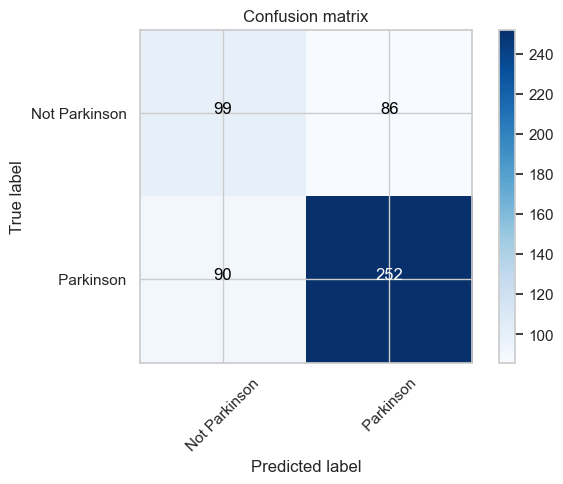

In [26]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=["Not Parkinson", " Parkinson"],
                      title='Confusion matrix')

Fungsi classification_report() menghasilkan sebuah laporan yang menyajikan metrik-metrik kunci untuk menilai kinerja model klasifikasi pada set data uji (y_test) dibandingkan dengan prediksi yang dibuat oleh model (y_pred). 
Fungsi accuracy_score() menghitung akurasi model, yang didefinisikan sebagai proporsi jumlah prediksi yang benar terhadap total jumlah sampel.

In [27]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.54      0.53       185
           1       0.75      0.74      0.74       342

    accuracy                           0.67       527
   macro avg       0.63      0.64      0.64       527
weighted avg       0.67      0.67      0.67       527


Accuracy Score: 0.6660341555977229


# K-Means

Membagi variabel dependent (diagnosis) dan variabel independent seluruhnya kecuali diagnosis

In [28]:
X = df
y = df['Diagnosis']

Memastikan bahwa data kategorikal telah diubah menjadi format numerik yang sesuai untuk kebanyakan algoritma machine learning

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Diagnosis'] = le.fit_transform(X['Diagnosis'])

y = le.transform(y)

Mengkonversi Array menjadi dataframe
Menskalakan setiap fitur ke rentang yang diberikan, biasanya 0 hingga 1, atau sehingga minimum dan maksimum setiap fitur adalah 0 dan 1, secara berturut-turut.
Metode fit_transform() dari ms pertama menyesuaikan scaler ke data dengan menghitung nilai minimum dan maksimum setiap fitur, sehingga dapat menskalakan data. Kemudian, mengubah data tersebut untuk menghasilkan versi berskala dari X dimana setiap fitur sekarang berada dalam rentang dari 0 hingga 1.

In [30]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

Algoritma akan mencoba menemukan tiga cluster dalam data. Parameter n_clusters mendefinisikan jumlah cluster yang diinginkan dalam dataset. 

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

Merujuk pada array yang berisi koordinat pusat (centroid) dari setiap cluster

In [32]:
centers

array([[ 4.90530353e-01,  5.17575400e-01,  4.99616858e-01,
         2.29885057e-01,  4.46743295e-01,  4.95280071e-01,
         2.98850575e-01,  5.10778537e-01,  5.04363943e-01,
         4.86259079e-01,  4.89857929e-01,  1.49425287e-01,
         1.11877395e-01,  1.43295019e-01,  1.63984674e-01,
         2.23754789e-01,  5.36398467e-02,  4.90266477e-01,
         5.06201701e-01,  5.07622464e-01,  5.10960305e-01,
         4.91240207e-01,  4.97463125e-01,  5.98303045e-01,
         4.64193506e-01,  4.47217027e-01,  5.38697318e-01,
         3.16475096e-01,  2.66666667e-01,  1.79310345e-01,
         2.90421456e-01,  2.42145594e-01,  3.05747126e-01,
         9.99233716e-01],
       [ 5.15447362e-01,  4.78205128e-01,  4.81250000e-01,
         2.32500000e-01,  4.44166667e-01,  4.76680442e-01,
         2.92500000e-01,  4.88324150e-01,  4.97350179e-01,
         5.00030327e-01,  5.15000278e-01,  1.40000000e-01,
         9.75000000e-02,  1.50000000e-01,  1.22500000e-01,
         1.75000000e-01,  4.12

Inertia adalah jumlah total jarak kuadrat dari setiap titik data ke centroid cluster terdekatnya. Hasil Inertia dari model K-Means dapat digunakan sebagai metrik untuk mengevaluasi kualitas klasterisasi. Semakin kecil nilai inertia, semakin baik model klasterisasi.

Pada data ini nilai inertia menunjukkan angka 8320. Ini menunjukkan bahwa Inertia yang dimiliki oleh data ini sangatlah tinggi. Sebenarnya data ini merupakan data yang tidak terlalu baik untuk di klasterkan karena data ini memiliki banyak outlier dan data yang tidak terlalu jelas. Oleh karena itu, sebenarnya metode kmeans ini tidak cocok untuk data ini.

In [33]:
kmeans.inertia_

8320.370429696315

Menampilkan hasil klasterisasi dari model K-Means. Setiap titik data diplot pada grafik dengan warna yang sesuai dengan klaster yang dihasilkan oleh model. Pusat klaster juga ditandai dengan warna hitam.

Hasil dari scatter di bawah menunjukkan data yang tidak terklaster dengan baik karena data ini memiliki banyak outlier dan data yang tidak terlalu jelas.

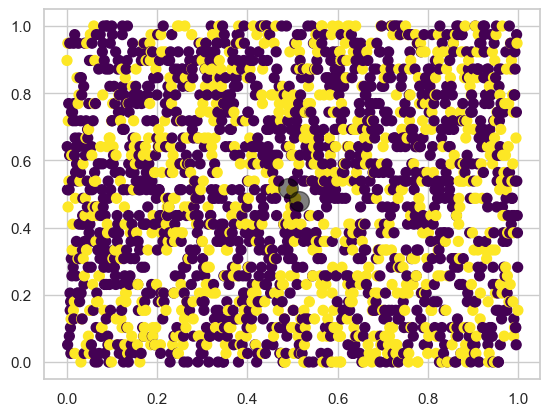

In [34]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

 menampilkan berapa banyak sampel yang berhasil dilabeli dengan benar dari total sampel. Y.size mengembalikan total jumlah elemen dalam array Y, yang sama dengan jumlah total sampel. menghitung skor akurasi dengan membagi jumlah label yang benar dengan jumlah total sampel. 

In [35]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))

Result: 1 out of 2105 samples were correctly labeled.
Accuracy score: 0.00


Confusion matrix, without normalization
[[   1  800]
 [1304    0]]


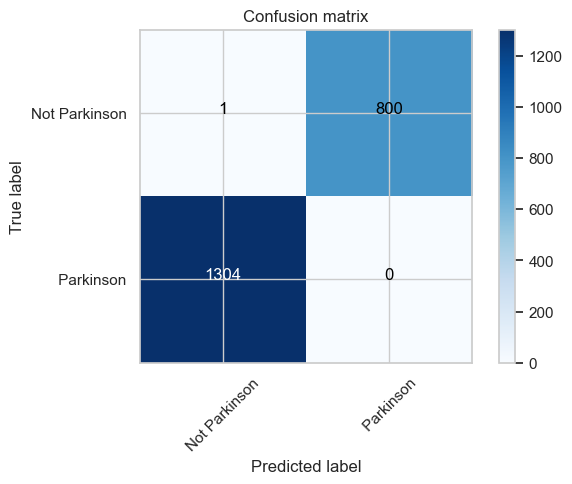

In [36]:
plot_confusion_matrix(confusion_matrix(y, labels), classes=["Not Parkinson", " Parkinson"],
                      title='Confusion matrix')

# K-NN and K-Means Hybrid

In [37]:
from sklearn.utils import check_X_y, check_array
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

Pemeriksaan dan Persiapan Data: Memeriksa bahwa data X (fitur) dan y (label) sesuai untuk analisis, dan memastikan hanya ada dua kelas (0 dan 1), cocok untuk klasifikasi biner.

Konversi Tipe Data: Mengubah tipe data fitur X ke float32 untuk pengolahan yang lebih efisien.

K-Means Clustering: Melatih model K-Means pada data dengan jumlah cluster yang ditentukan (50,000 dalam hal ini), yang digunakan untuk mengelompokkan data.

Menetapkan Cluster dan Mengumpulkan Data: Setelah K-Means dilatih, data digunakan untuk memprediksi cluster (I) untuk setiap sampel. Data ini kemudian dikumpulkan dengan label yang sesuai untuk menciptakan DataFrame baru.

Aggregasi Data: Menghitung rata-rata (probabilitas) dan jumlah (bobot) dari label di setiap cluster. Rata-rata memberikan probabilitas label positif dalam cluster, dan jumlah memberikan berat atau signifikansi setiap cluster berdasarkan jumlah sampel yang dimiliki.

Nearest Neighbors: Menyiapkan model Nearest Neighbors yang dilatih pada centroid dari cluster yang dihasilkan oleh K-Means. Ini memungkinkan pencarian cepat dari tetangga terdekat berdasarkan titik data baru.

Pengembalian Model: Fungsi mengembalikan model K-Means, model Nearest Neighbors, probabilitas centroid, dan bobot centroid, yang semuanya berguna untuk prediksi dan analisis lebih lanjut.

In [38]:
def fit_kmeans_knn(X, y, n_centroids=50000, random_state=0, verbose=False):
    X, y = check_X_y(X, y)
    classes_ = np.unique(y)
    assert np.array_equal(classes_, np.arange(2))  # Assumes binary classification

    X = X.astype(np.float32)
    kmeans = KMeans(n_clusters=n_centroids, random_state=random_state, verbose=verbose)
    kmeans.fit(X)
    I = kmeans.predict(X)

    centroid_data = pd.DataFrame({'I': I, 'y': y})
    agg_data = centroid_data.groupby('I').agg(['mean', 'count']).values
    centroid_probs = agg_data[:, 0]
    centroid_weights = agg_data[:, 1]

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(kmeans.cluster_centers_)

    return kmeans, neigh, centroid_probs, centroid_weights

Memeriksa dan Menyiapkan Data: Fungsi ini memastikan data X sudah dalam format yang benar untuk diproses.

Mencari Tetangga Terdekat: Menggunakan model Nearest Neighbors yang sudah dilatih, fungsi ini mencari beberapa tetangga terdekat untuk setiap sampel di X.

Mendapatkan Probabilitas: Setiap tetangga terdekat memiliki probabilitas yang terkait dengannya, yang menunjukkan seberapa mungkin tetangga tersebut termasuk dalam kategori tertentu. Fungsi ini mengumpulkan probabilitas ini.

Menghitung Rata-rata Tertimbang: Menggunakan probabilitas yang dikumpulkan dan bobot tertentu (yang menggambarkan pentingnya masing-masing tetangga), fungsi ini menghitung rata-rata tertimbang dari probabilitas untuk lebih akurat mewakili peluang setiap sampel dalam X.

Mengembalikan Probabilitas: Akhirnya, fungsi ini mengembalikan probabilitas yang telah dihitung dalam format yang memudahkan interpretasi: peluang untuk tidak termasuk dalam kategori (1-p) dan peluang untuk termasuk dalam kategori (p).

In [39]:
def predict_proba_kmeans_knn(X, kmeans, neigh, centroid_probs, centroid_weights, n_neighbors=1):
    X = check_array(X)
    distances, I = neigh.kneighbors(X, n_neighbors=n_neighbors)
    probs = centroid_probs[I]
    weights = centroid_weights[I]
    p = np.average(probs, axis=1, weights=weights)
    return np.c_[1 - p, p]

Menghitung Probabilitas: Fungsi ini pertama-tama memanggil predict_proba_kmeans_knn untuk mendapatkan probabilitas masing-masing sampel dalam X termasuk dalam kelas positif (kelas 1). Fungsi predict_proba_kmeans_knn memberikan output berupa array dua kolom, di mana kolom kedua ([:,1]) mewakili probabilitas sampel tersebut termasuk dalam kelas 1.

Pembulatan Probabilitas: Setelah mendapatkan probabilitas kelas positif, fungsi menggunakan np.around untuk membulatkan nilai probabilitas ini. Fungsi pembulatan ini akan mengubah nilai probabilitas menjadi 0 atau 1 berdasarkan aturan pembulatan standar (nilai di bawah 0.5 menjadi 0, nilai 0.5 atau lebih menjadi 1). Ini mengubah probabilitas menjadi keputusan kelas yang jelas.

Konversi Tipe Data: Setelah pembulatan, fungsi mengkonversi hasilnya menjadi np.int32, sebuah format integer 32-bit, untuk membuat output akhir yang bersih dan rapi, sesuai dengan apa yang diharapkan untuk label kelas dalam banyak konteks pengolahan data.

Mengembalikan Hasil: Hasilnya, array integer dengan nilai 0 atau 1 yang menunjukkan kelas prediksi untuk setiap sampel di X, kemudian dikembalikan sebagai output fungsi.

In [40]:
def predict_kmeans_knn(X, kmeans, neigh, centroid_probs, centroid_weights, n_neighbors=1):
    return np.around(
        predict_proba_kmeans_knn(X, kmeans, neigh, centroid_probs, centroid_weights, n_neighbors)[:, 1]).astype(
        np.int32)

menghapus kolom yang tidak diinginkan dari DataFrame df. Dalam hal ini, kolom Diagnosis dan PatientID dihapus.
kolom Diagnosis dari DataFrame df disimpan dalam variabel y.

In [41]:
X = df.drop(['Diagnosis', 'PatientID'], axis=1)

y = df['Diagnosis']

Pembagian Data: Menggunakan metode ShuffleSplit untuk memisahkan data menjadi dua bagian, yaitu data untuk melatih (train) dan menguji (test) model.

Normalisasi Data: Menggunakan StandardScaler untuk membuat skala fitur data pelatihan dan pengujian menjadi standar (rata-rata 0 dan deviasi standar 1) agar model lebih efektif.

Pelatihan Model: Melatih model menggunakan algoritma K-Means dan Nearest Neighbors dengan data yang telah dinormalisasi. Model ini belajar mengelompokkan data ke dalam beberapa kelompok (centroid) dan mengetahui kecenderungan label data.

Prediksi: Menggunakan model yang telah dilatih untuk memprediksi kelas dari data uji, menghasilkan estimasi probabilitas bahwa setiap sampel termasuk dalam kelas tertentu.

Evaluasi Model: Menggunakan skor ROC AUC untuk menilai seberapa baik model membedakan antara kelas-kelas yang berbeda, dan classification_report untuk melihat detail kinerja model seperti presisi, recall, dan skor F1.

Ringkasan Kinerja: Menghitung dan mencetak skor ROC AUC rata-rata dari model untuk mengetahui seberapa akurat model secara keseluruhan dalam memprediksi data uji.

In [42]:
kfold = ShuffleSplit(1)
scores = []

print("\nClassification Report:\n")
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit model
    kmeans, neigh, centroid_probs, centroid_weights = fit_kmeans_knn(X_train_scaled, y_train, n_centroids=2)

    # Predict probabilities
    y_pred_proba = predict_proba_kmeans_knn(X_test_scaled, kmeans, neigh, centroid_probs, centroid_weights)
    y_pred = y_pred_proba[:, 1]

    # Calculate ROC AUC score
    score = roc_auc_score(y_test, y_pred)
    scores.append(score)
    
    y_pred = y_pred >= 0
    print(classification_report(y_test, y_pred, zero_division=0))

print("\nROC AUC Score:", F'{np.mean(scores):.5f} ± {np.std(scores):.5f}')



Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.58      1.00      0.73       122

    accuracy                           0.58       211
   macro avg       0.29      0.50      0.37       211
weighted avg       0.33      0.58      0.42       211


ROC AUC Score: 0.57902 ± 0.00000
